# <font style="color:green">Trabalho da Disciplina de Processamento Digital de Imagens (Primeira Parte)</font>

O presente trabalho visa demonstrar a montagem de uma de um tabuleiro de xadrez, e a manipulação da cor branca, utilizando as bibliotecas numpy e matplotlib.

# <font style="color:green">Documentações</font>

* Numpy: https://numpy.org/doc/stable/
* Matplotlib: https://matplotlib.org/3.5.1/index.html


## <font style="color:green">Importando <i>libraries </i></font>

In [15]:
import numpy as np
import matplotlib.pyplot as plt

## <font style="color:green">Declarando variáveis x, y</font>

In [16]:
# Responsáveis pelas dimensões 10x10 pix de cada quadrado preto ou branco
x, y = 10, 10

## <font style="color:green">Declarando variáveis B, W</font>

In [17]:
# São criados 2 respectivos arrays composto por 0's (para cor preta) e 1's (para cor branca)
W = np.ones((x, y))
B = np.zeros((x, y))

## ## <font style="color:green">Criando os padrões <i>White Black</i> e <i>Black White</i></font>

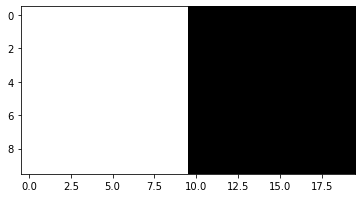

In [18]:
# Concatenação do arrays W, B e em seguida é exibido o padrão Black White
WB = np.c_[B, W]
plt.imshow(WB, cmap= "binary", vmin = 0, vmax = 1)
plt.show()

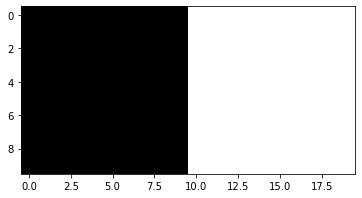

In [19]:
# Concatenação do arrays B, W e exibição do padrão White Black
BW = np.c_[W, B]
plt.imshow(BW, cmap= "binary", vmin = 0, vmax = 1)
plt.show()

## <font style="color:green">Criação do padrão de repetição de 5 quadrados <i>White Black</i> e <i>Black White</i></font>

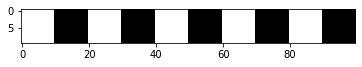

In [20]:
# Criando o padrão de repetição de 5 quadrados WB_tiled e exibição
WB_tiled = np.tile(WB, 5)
plt.imshow(WB_tiled, cmap= "binary", vmin = 0, vmax = 1)
plt.show()

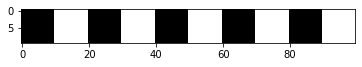

In [21]:
# Criando o padrão de repetição de 5 quadrados BW_tiled e exibição
BW_tiled = np.tile(BW, 5)
plt.imshow(BW_tiled, cmap= "binary", vmin = 0, vmax = 1)
plt.show()

## <font style="color:green">Criação do Tabuleiro de Xadrez </font>

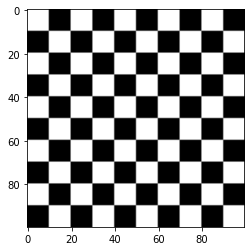

In [22]:
# Os padrões WB_tiled e BW_tiled são verticalmente contatenado e em seguida horizontalmente concatenados
WB_BW = np.vstack((WB_tiled, BW_tiled))
chessPattern = np.tile(WB_BW, (5,1))
# Exibição
plt.imshow(chessPattern, cmap= "binary", vmin = 0, vmax = 1)
plt.show()

## <font style="color:green">Manipulação de cor dos quadrados brancos do Tabuleiro de Xadrez</font>

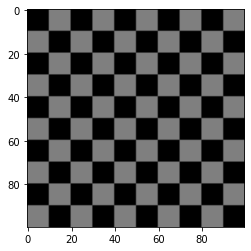

In [23]:
# chessPattern é convertido para um int de 8 bits para que possa ser trabalho com a escala de cinzas
chessPattern = np.array(chessPattern, dtype = np.uint8)
# Utilizamos o método where para procurar quaisquer valor do array igual 1 (branco) e substituir para 127 (cinza)
chessPattern[np.where(chessPattern == 1)] = 127
# Exibição do tabuleiro de xadrez agora com quadrados cinzas
plt.imshow(chessPattern, cmap= "gray", vmin = 0, vmax = 255)
plt.show()

## <font style="color:green">Mudança de dimensão do Tabuleiro de Xadrez para 3 dimensões</font>

In [24]:
# Redeclaração do array chessPatter
chessPattern = np.array(chessPattern, dtype=np.uint8, order='F')
# utilização do método resize para remodelar a dimensão de chessPattern como uma matriz com 3 canais para trabalhar com RGB
chessPattern.resize(x * 10, y * 10, 3)

## <font style="color:green">Declaração de variáveis que correspondem as cores em RGB</font>

In [25]:
# Branco
white = [255, 255, 255]
# Vermelho
red = [255, 0, 0]
# Verde
green = [0, 255, 0]
# Azul
blue = [0, 0, 255]
# Amarelo
yellow = [255, 255, 0]
# Magenta
magenta = [255, 0, 255]

## <font style="color:green">Declaração das variaveís que corresponderá a novos tabuleiros de xadrez</font>

In [26]:
# Inicialmente, as variaveís recebem o array que corresponde ao chessPattern original
chessPattern_red = np.array(chessPattern, dtype=np.uint8)
chessPattern_green = np.array(chessPattern, dtype=np.uint8)
chessPattern_blue = np.array(chessPattern, dtype=np.uint8)
chessPattern_yellow = np.array(chessPattern, dtype=np.uint8)
chessPattern_magenta = np.array(chessPattern, dtype=np.uint8)

## <font style="color:green">Declaração das variavéis mascaras de cores e modificação das cores</font>

In [27]:
# Como o chessPattern sofreu com a modificação de seus valores 1's para 127's, as variavéis auxiliares receberão
# os valores 127 do array chessPattern par auxíliar na mudança decor
white_mask = green_mask = red_mask = blue_mask = yellow_mask = magenta_mask = chessPattern[:, :, 0] == 127

# O array chessPattern recebendo como indice as variáveis auxíliares receberão os valores em RGB das cores anteriormente
# descritas
chessPattern[white_mask] = white
chessPattern_red[red_mask] = red
chessPattern_green[green_mask] = green
chessPattern_blue[blue_mask] = blue
chessPattern_yellow[yellow_mask] = yellow
chessPattern_magenta[magenta_mask] = magenta

## <font style="color:green">Exibição dos tabuleiros</font>

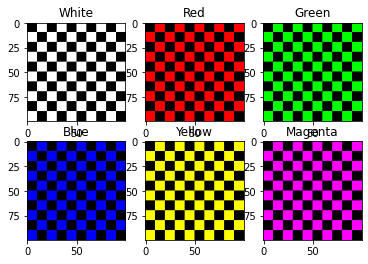

In [28]:
# Utiliza-se o método subplot para que a exibição conjunta dos arrays
# chess pattern seja feita
# Utiliza-se o método title par exibir os títulos

plt.subplot(2, 3, 1)
plt.title("White")
plt.imshow(chessPattern, vmin = 0, vmax = 255)

plt.subplot(2, 3, 2)
plt.title("Red")
plt.imshow(chessPattern_red, vmin = 0, vmax = 255)

plt.subplot(2, 3, 3)
plt.title("Green")
plt.imshow(chessPattern_green, vmin = 0, vmax = 255)

plt.subplot(2, 3, 4)
plt.title("Blue")
plt.imshow(chessPattern_blue, vmin = 0, vmax = 255)

plt.subplot(2, 3, 5)
plt.title("Yellow")
plt.imshow(chessPattern_yellow, vmin = 0, vmax = 255)

plt.subplot(2, 3, 6)
plt.title("Magenta")
plt.imshow(chessPattern_magenta, vmin = 0, vmax = 255)

# Exibição
plt.show()